# Module 4 - Algo Trading using Classification

   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


### Query 4.1

a. Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band

b. Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the    accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for        each)

c. Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for        this new stock.

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('week2.csv')
df['Upper Band'] = df['Close Price'].rolling(window = 14).mean() + df['Close Price'].rolling(window = 14).std()*2
df['Lower Band'] = df['Close Price'].rolling(window = 14).mean() - df['Close Price'].rolling(window = 14).std()*2
df['Middle Band'] = df['Close Price'].rolling(window = 14).mean()

df.dropna(inplace = True)
df.Date = df.Date.astype('datetime64[s]')
df.reset_index(inplace = True)
df = df[['Date', 'Close Price', 'Upper Band', 'Lower Band', 'Middle Band']]

df['Call'] = ""
df['Label'] = 0

for i in range(0,len(df)):
    
    if(df.at[i, 'Close Price'] < df.at[i, 'Lower Band']):
        df.at[i,'Call'] = "Buy"
        df.at[i,'Label'] = 1
        
    elif(df.at[i, 'Close Price'] >= df.at[i, 'Lower Band'] and df.at[i, 'Close Price'] < df.at[i, 'Middle Band']):
        df.at[i, 'Call'] = "Hold Buy"
        df.at[i,'Label'] = 2
        
    elif(df.at[i, 'Close Price'] >= df.at[i, 'Middle Band'] and df.at[i, 'Close Price'] < df.at[i, 'Upper Band']):
        df.at[i, 'Call'] = "Hold Short"        
        df.at[i,'Label'] = 3
        
    else:
        df.at[i, 'Call'] = "Short"    
        df.at[i,'Label'] = 4
        
df.set_index('Date').head()  

,Close Price,Upper Band,Lower Band,Middle Band,Call,Label
Date,,,,,,
2017-06-01,153.05,162.385545,142.043027,152.214286,Hold Short,3
2017-06-02,159.35,161.218345,142.738798,151.978571,Hold Short,3
2017-06-05,162.90,162.686560,141.884869,152.285714,Short,4
2017-06-06,164.10,164.511487,140.895656,152.703571,Hold Short,3
2017-06-07,160.75,165.284460,140.601254,152.942857,Hold Short,3


In [128]:
X = np.array(df[['Close Price', 'Upper Band', 'Lower Band', 'Middle Band']])
y = np.array(df['Label'])
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [129]:
logistic_model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', max_iter = 10000).fit(X_train, y_train)
print('Prediction Accuracy for Logistic Regression: ' + str(logistic_model.score(X_test,y_test)*100))

Prediction Accuracy for Logistic Regression: 96.90721649484536


In [130]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print('Prediction Accuracy for SVM: ' + str(svm_model_linear.score(X_test,y_test)*100))

Prediction Accuracy for SVM: 96.90721649484536


In [131]:
dtree_model = DecisionTreeClassifier(random_state = 0,max_depth = 5).fit(X_train, y_train) 
print('Prediction Accuracy for Decision Tree Classifier: ' + str(dtree_model.score(X_test,y_test)*100))

Prediction Accuracy for Decision Tree Classifier: 75.25773195876289


The various Scores for the Classification Models used are:

>Logistic Regression : 96%

>Support Vector Machine : 96.09%

>Decision Tree Clssifier : 75.25%

Now using SVM on the stocks of the company PVR, we have :-

In [132]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\PVR.csv')

In [133]:
df['Upper Band'] = df['Close Price'].rolling(window = 14).mean() + df['Close Price'].rolling(window = 14).std()*2
df['Lower Band'] = df['Close Price'].rolling(window = 14).mean() - df['Close Price'].rolling(window = 14).std()*2
df['Middle Band'] = df['Close Price'].rolling(window = 14).mean()

df.dropna(inplace = True)
df.Date = df.Date.astype('datetime64[s]')
df.reset_index(inplace = True)
df = df[['Date', 'Close Price', 'Upper Band', 'Lower Band', 'Middle Band']] 

In [134]:
X_pvr = np.array(df[['Close Price', 'Upper Band', 'Lower Band', 'Middle Band']])
df['label'] = pd.DataFrame(svm_model_linear.predict(X_pvr))

In [135]:
df['Call'] = ""
for i in range(0,len(df)):
    
    if(df.at[i, 'label'] == 1):
        df.at[i, 'Call'] = 'Buy'
        
    elif(df.at[i, 'label'] == 2):
        df.at[i, 'Call'] = 'Hold Buy'
        
    elif(df.at[i, 'label'] == 3):
        df.at[i, 'Call'] = 'Hold Short'
        
    else:
        df.at[i, 'Call'] = 'Short'
        
df.index = df.Date 
df = df.drop('label', axis = 1)

Using the trained model to predict the stocks of PVR we have :-

In [136]:
df.head().drop('Date', axis = 1)

,Close Price,Upper Band,Lower Band,Middle Band,Call
Date,,,,,
2017-06-01,1455.70,1551.543241,1421.935331,1486.739286,Hold Buy
2017-06-02,1457.80,1544.463966,1419.421749,1481.942857,Hold Buy
2017-06-05,1442.25,1531.478940,1418.585345,1475.032143,Hold Buy
2017-06-06,1392.85,1527.738588,1402.689984,1465.214286,Buy
2017-06-07,1400.70,1521.376556,1392.716301,1457.046429,Hold Buy


### Query 4.2 
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

a. Import the stock data file of your choice

b. Define 4 new columns , whose values are: 
   % change between Open and Close price for the day 
   % change between Low and High price for the day 
   5 day rolling mean of the day to day % change in Close Price 
   5 day rolling std of the day to day % change in Close Price
   
c. Create a new column 'Action' whose values are: 
   1 if next day's price(Close) is greater than present day's. 
   (-1) if next day's price(Close) is less than present day's. 

d. Construct a classification model with the 4 new inputs and 'Action' as target

e. Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [137]:
df = pd.read_csv('week3.csv')
df['%Change Open and Close'] = ((df['Close Price'] - df['Open Price'])/df['Close Price'])*100
df['%Change High and Low'] = ((df['High Price'] - df['Low Price'])/df['High Price'])*100
df['Day to Day % Change'] =  df['Close Price'].pct_change()*100
df['Day to Day % Change Mean'] = df['Day to Day % Change'].rolling(window = 5).mean()
df['Day to Day % Change Std.'] = df['Day to Day % Change'].rolling(window = 5).std()
df.dropna(inplace = True)
df.Date = df.Date.astype('datetime64[s]')
df.reset_index(inplace = True)
df.drop('index',axis = 1, inplace = True)
df.head()

df['Action'] = 0

for i in range(0,len(df)-1):
    
    if(df.at[i+1, 'Close Price'] > df.at[i, 'Close Price']):
        df.at[i, 'Action'] = 1
        
    else:
        df.at[i, 'Action'] = -1
        
df.index = df.Date
df = df[['Close Price', '%Change Open and Close',
         '%Change High and Low','Day to Day % Change Mean',
         'Day to Day % Change Std.','Action']]  

df = df.where(df['Action'] != 0)
df.dropna(inplace = True)

df.head()

,Close Price,%Change Open and Close,%Change High and Low,Day to Day % Change Mean,Day to Day % Change Std.,Action
Date,,,,,,
2017-06-01,153.05,3.626266,6.200318,0.458216,1.413629,1.0
2017-06-02,159.35,2.698463,6.475260,1.281476,2.108093,1.0
2017-06-05,162.90,1.718846,4.106715,1.867364,1.804349,1.0
2017-06-06,164.10,0.121877,4.451039,1.853186,1.815006,-1.0
2017-06-07,160.75,-2.612753,5.749852,1.558383,2.347935,-1.0


In [138]:
X = np.array(df[['%Change Open and Close', '%Change High and Low','Day to Day % Change Mean', 'Day to Day % Change Std.']])
y = np.array(df['Action'])

In [139]:
randonforest_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', max_depth=1000)
randonforest_clf.fit(X,y)
randonforest_clf.score(X,y)

1.0

Accuracy for the Random Forest Classifier is 100%

In [141]:
df.reset_index(inplace = True)
df['Cumulative Returns'] = df['Close Price']/df.at[0, 'Close Price'] - 1
df.index = df.Date

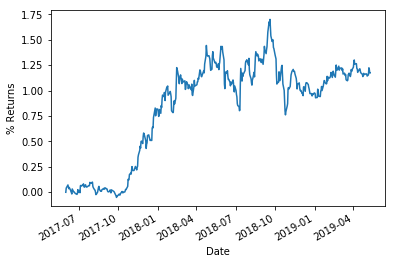

In [149]:
df['Cumulative Returns'].plot()
t = plt.ylabel('% Returns')